In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib

Using matplotlib backend: Qt5Agg


# A Brief matplotlib API Primer

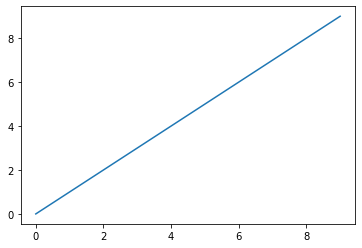

In [2]:
data = np.arange(10)
plt.plot(data)

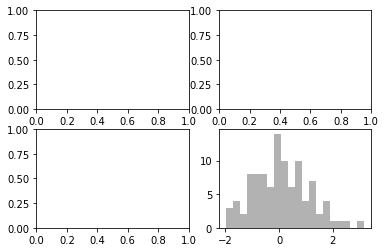

In [3]:
fig, axes = plt.subplots(2, 2)
axes[1, 1] = plt.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

#### Adjusting the Spacing Around Subplots

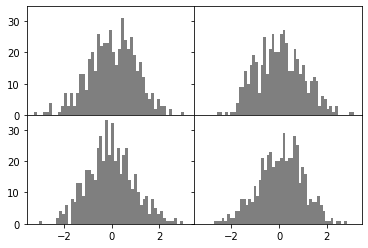

In [10]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)

plt.subplots_adjust(wspace=0, hspace=0)

#### Colors, Markers and Line Styles

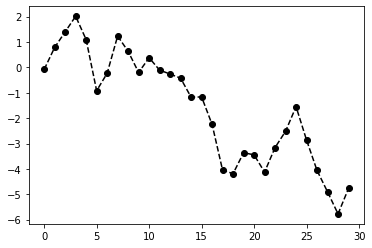

In [13]:
plt.plot(np.random.randn(30).cumsum(), 'ko--')

This can also be written as:

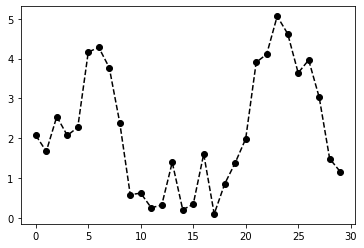

In [14]:
plt.plot(np.random.randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

For line plots, subsequent points are linearly interpolated by deafult. This can be changes with the drawstyle option:

In [15]:
data = np.random.randn(30).cumsum()

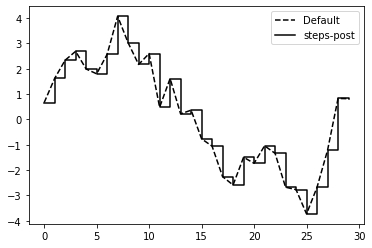

In [20]:
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

#### Ticks, Labels, and Legends

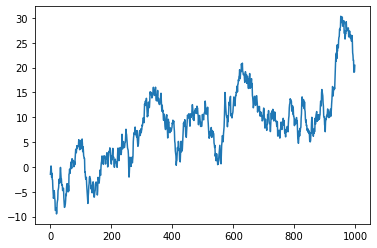

In [32]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(np.random.randn(1000).cumsum())

Text(0.5, 0, 'Stages')

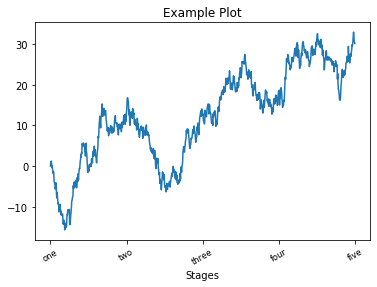

In [35]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(np.random.randn(1000).cumsum())

ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')
ax.set_title('Example Plot')
ax.set_xlabel('Stages')

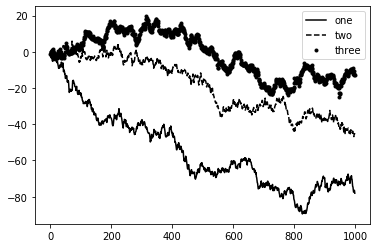

In [47]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(np.random.randn(1000).cumsum(), 'k', label='one')
ax.plot(np.random.randn(1000).cumsum(), 'k--', label='two')
ax.plot(np.random.randn(1000).cumsum(), 'k.', label='three')

ax.legend(loc='best')

#### Annotations and Drawing on Subplot

Text(0.5, 1.0, 'Important Dates in the 2008-2009 Financial Crisis')

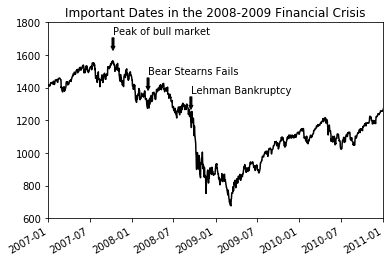

In [49]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75), xytext=(date, spx.asof(date) + 225),
               arrowprops=dict(facecolor='black', headwidth=4, width=2, headlength=4),
               horizontalalignment='left', verticalalignment='top')
    
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
ax.set_title('Important Dates in the 2008-2009 Financial Crisis')

#### Saving Plots to File

In [50]:
plt.savefig('figpath.svg')

<Figure size 432x288 with 0 Axes>

In [51]:
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

Configuring matplotlib:

In [52]:
font_options = {'family': 'monospace', 'weight': 'bold', 'size': 'small'}
plt.rc('font', **font_options)

# Plotting with pandas and seaborn

#### Line Plots

Series and DataFrame each have a plot attribute for making some basic plot types:

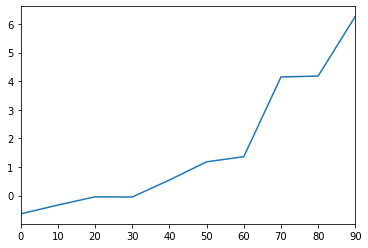

In [53]:
pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10)).plot()

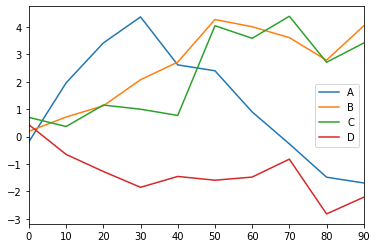

In [54]:
pd.DataFrame(np.random.randn(10, 4).cumsum(0), columns=list('ABCD'), index=np.arange(0, 100, 10)).plot()

#### Bar Plots

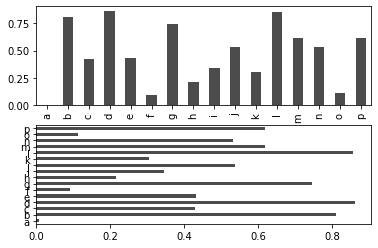

In [56]:
fig, axes = plt.subplots(2, 1)

data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [57]:
df = pd.DataFrame(np.random.rand(6, 4), index=['one', 'two', 'three', 'four', 'five', 'six'],
                 columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.468459,0.901148,0.637210,0.039419
two,0.654258,0.370466,0.608240,0.093857
three,0.413709,0.695661,0.629710,0.862839
four,0.788099,0.915994,0.550198,0.412896
five,0.940483,0.230500,0.523195,0.145500
six,0.942667,0.387350,0.155082,0.785831


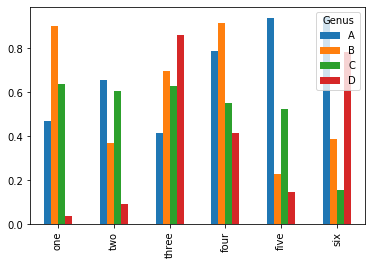

In [58]:
df.plot.bar()

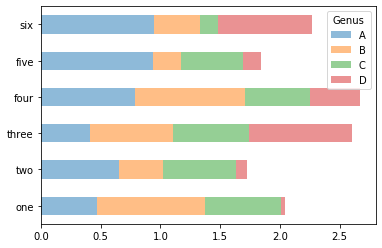

In [59]:
df.plot.barh(stacked=True, alpha=0.5)

In [60]:
tips = pd.read_csv('examples/tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [62]:
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts = party_counts.loc[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [63]:
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


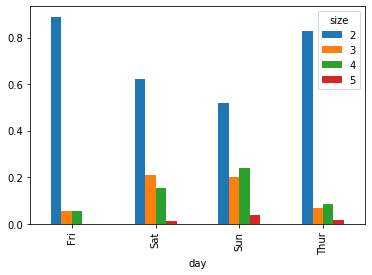

In [64]:
party_pcts.plot.bar()

In [65]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


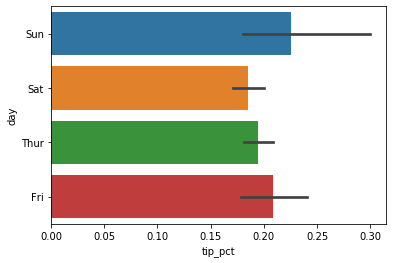

In [66]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

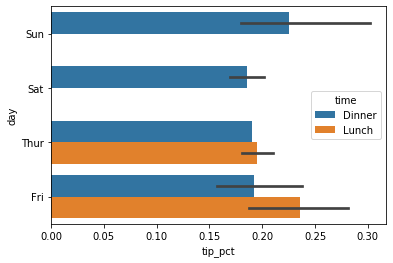

In [67]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

#### Histograms and Density Plots

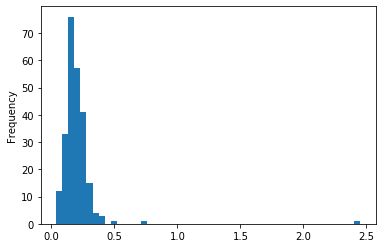

In [68]:
tips['tip_pct'].plot.hist(bins=50)

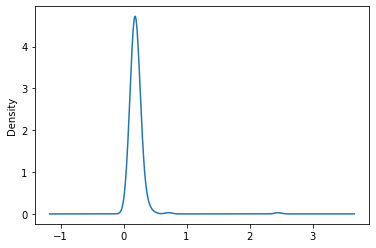

In [69]:
tips['tip_pct'].plot.density()

Seaborn makes histogram and density plots easier through its distplot method, which can plot both a histogram and a continuous density estimate simultaneously:

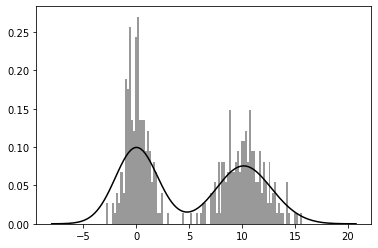

In [70]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)

values = pd.Series(np.concatenate([comp1, comp2]))

sns.distplot(values, bins=100, color='k')

#### Scatter or Point Plots

In [71]:
macro = pd.read_csv('examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


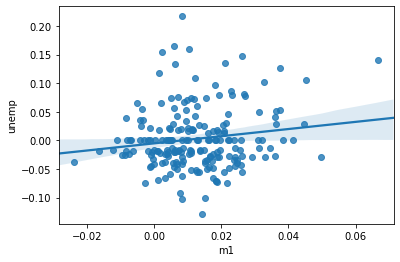

In [72]:
sns.regplot('m1', 'unemp', data=trans_data)

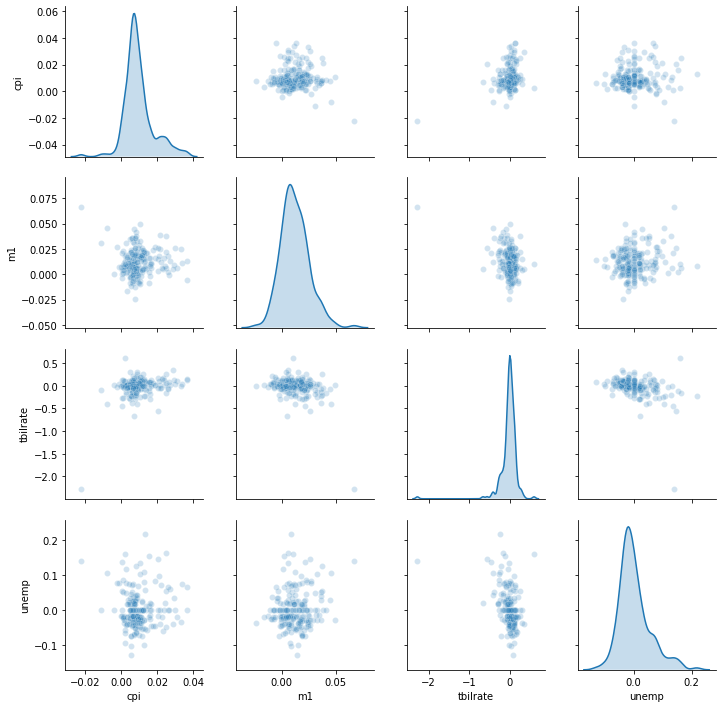

In [73]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

#### Facet Grids and Categorical Data

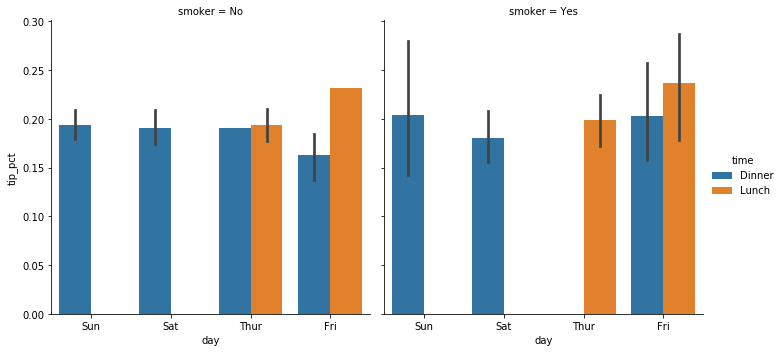

In [80]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

Instead of grouping by 'time' by different bar colors within a facet, we can also expand the grid by adding one row per time value:

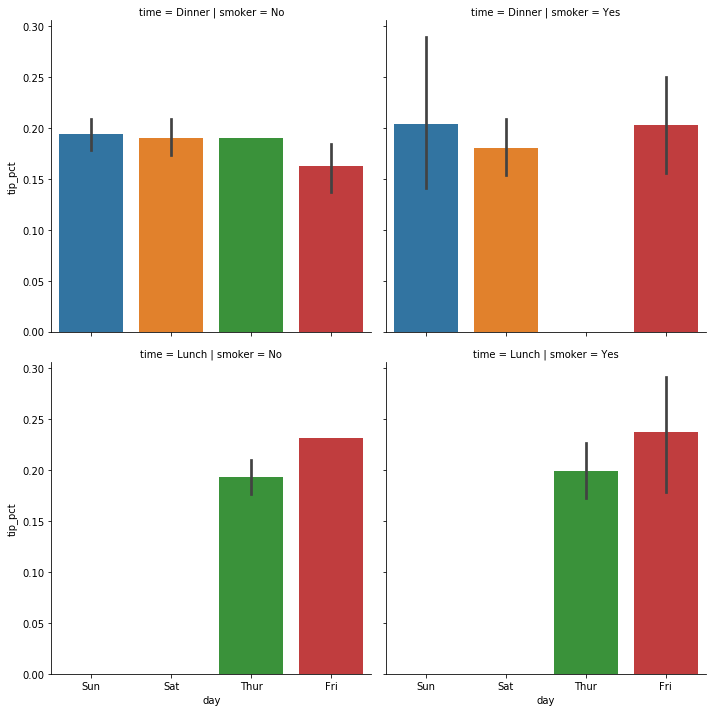

In [81]:
sns.factorplot(x='day', y='tip_pct', row='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

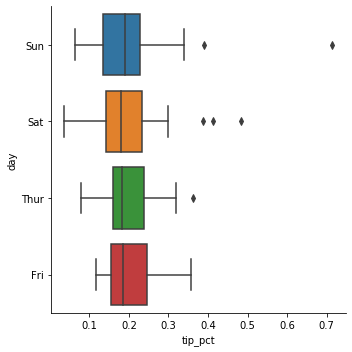

In [82]:
sns.factorplot(x='tip_pct', y='day', kind='box', data=tips[tips.tip_pct < 1])